In [2]:
#Import relevant libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [81]:
## Load Data
def load_data(celltype): 
    data_str = 'result_tables/GLM/' + celltype
    items = os.listdir(data_str)
    dfs = {}
    for item in items: 
        if item.endswith('.csv'):
            file_path = os.path.join(data_str, item)
            df = pd.read_csv(file_path)
            dfs[item] = df
    return dfs

In [82]:
#Load ON alpha Data
ON_alpha = 'ON_Alpha'
ON_alpha_data = load_data(ON_alpha)

#Load OFF sus data

OFF_sus = 'OFFsus'
OFF_sus_data = load_data(OFF_sus)

#Load OFF tr data
OFF_tr = 'OFFtr'
OFF_tr_data = load_data(OFF_tr)


In [5]:
Adict = pd.read_csv('result_tables/GLM/model_Adict_GLM.csv')
Cardio = pd.read_csv('result_tables/GLM/model_Cardio_GLM.csv')
Dem = pd.read_csv('result_tables/GLM/model_Dem_GLM.csv')
Metab = pd.read_csv('result_tables/GLM/model_Metab_GLM.csv')
Piscol = pd.read_csv('result_tables/GLM/model_Psicol_GLM.csv')

In [12]:
# Plotting function
def plot_lme_results(df, celltype, graph, ylabel):
    title = 'Effect on {}'.format(graph)
    var_names = df['Name'][1:]
    estimate = df['Estimate'][1:]
    p_values = df['pValue'][1:]

    # Plotting
    fig, ax = plt.subplots()

    # Set color based on celltype
    if celltype == 'ON alpha':
        colors = ['cyan'] * len(var_names)
    elif celltype == 'OFF sustained alpha':
        colors = ['magenta'] * len(var_names)  
    else:
        colors = ['seagreen'] * len(var_names)

    bars = ax.bar(var_names, estimate, color=colors, edgecolor='k')

    # Create a legend for the p values
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='red', markersize=10, label='p < 0.05'), 
        Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, label='p < 0.01')
        ]

    # Plot error bars for 95% CI in a separate legend. Just weird matplotlib issues
    handles, labels = ax.get_legend_handles_labels()
    handles.append(ax.errorbar([], [], yerr=1, fmt='o', color='k', markersize=5, capsize=5, capthick=1, elinewidth=1))
    labels.append('95% CI')

    # Combine the two legends
    handles.extend(legend_elements)
    labels.extend(['p < 0.05', 'p < 0.01', '95% CI'])

    # Display the combined legend
    ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

    ax.set_ylabel(ylabel)
    ax.set_title(title + ' {}'.format(celltype))
    ax.set_xticklabels(var_names, rotation=45, ha='right')
    ax.tick_params(axis='x', labelrotation=45)
    ax.set_xlabel('')

    plt.show()


C:\Users\santi\AppData\Local\Temp\ipykernel_28292\1361620995.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


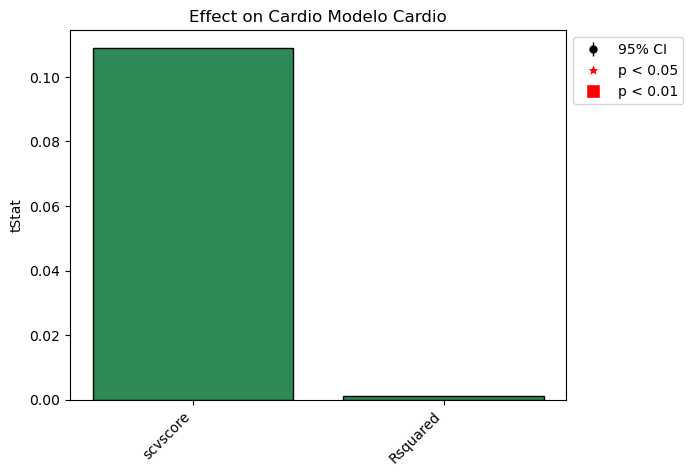

In [13]:
plot_lme_results(Cardio, 'Modelo Cardio', 'Cardio', 'tStat')


In [84]:
'''
# Function to plot the 3 alphas per condition
def show_plots (plot_str, title, ylabel):
    ON_df = ON_alpha_data['{}_ON_table.csv'.format(plot_str)]
    OFFsus_df = OFF_sus_data['{}_OFFsus_table.csv'.format(plot_str)]
    OFFtr_df = OFF_tr_data['{}_OFFtr_table.csv'.format(plot_str)]
    

    plot_lme_results(ON_df, 'ON alpha', title, ylabel)
    plot_lme_results(OFFsus_df, 'OFF sustained alpha', title, ylabel)
    plot_lme_results(OFFtr_df, 'OFF transient alpha', title, ylabel)
'''


C:\Users\santi\AppData\Local\Temp\ipykernel_28292\1361620995.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


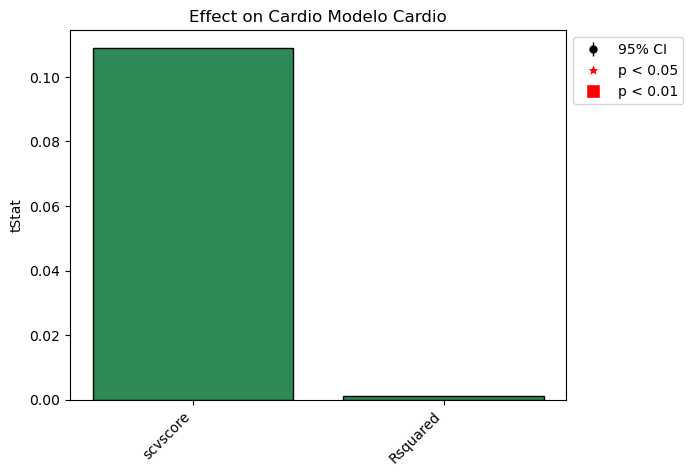

In [14]:
#Plot peak spot size 
plot_lme_results(Cardio, 'Modelo Cardio', 'Cardio', 'tStat')

C:\Users\santi\AppData\Local\Temp\ipykernel_28292\1361620995.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


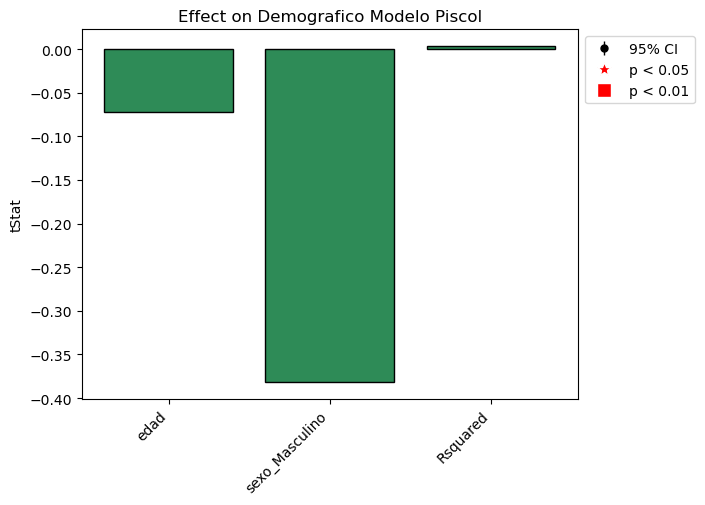

In [15]:
plot_lme_results(Dem, 'Modelo Piscol', 'Demografico', 'tStat')

C:\Users\santi\AppData\Local\Temp\ipykernel_28292\1361620995.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


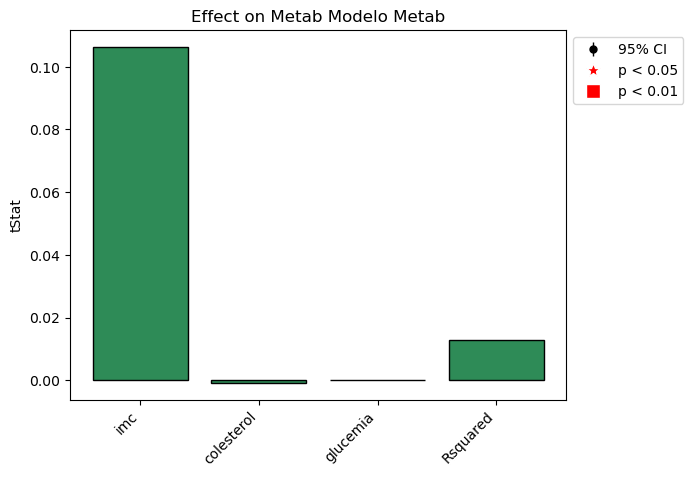

In [16]:
plot_lme_results(Metab, 'Modelo Metab', 'Metab', 'tStat')

C:\Users\santi\AppData\Local\Temp\ipykernel_28292\1361620995.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


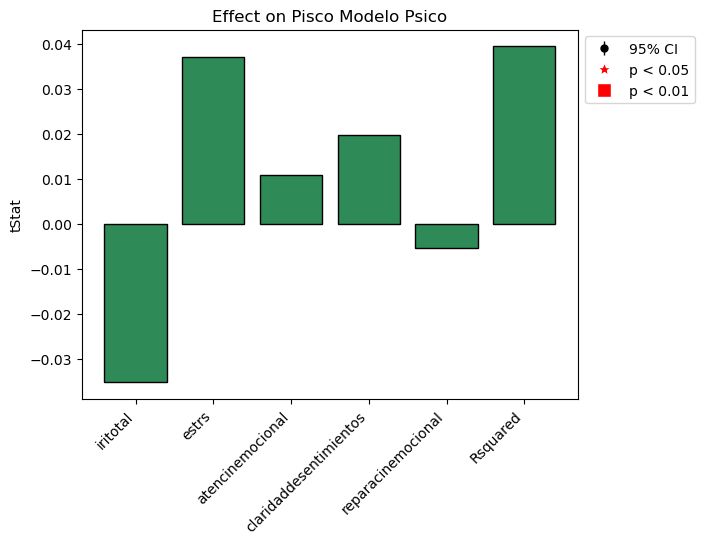

In [17]:
plot_lme_results(Piscol, 'Modelo Psico', 'Pisco', 'tStat')

In [18]:
#Plot effect on baseline FR
show_plots('lme_baseline_FR', 'baseline FR', 'Δ Firing rate (Hz)')

NameError: name 'show_plots' is not defined

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


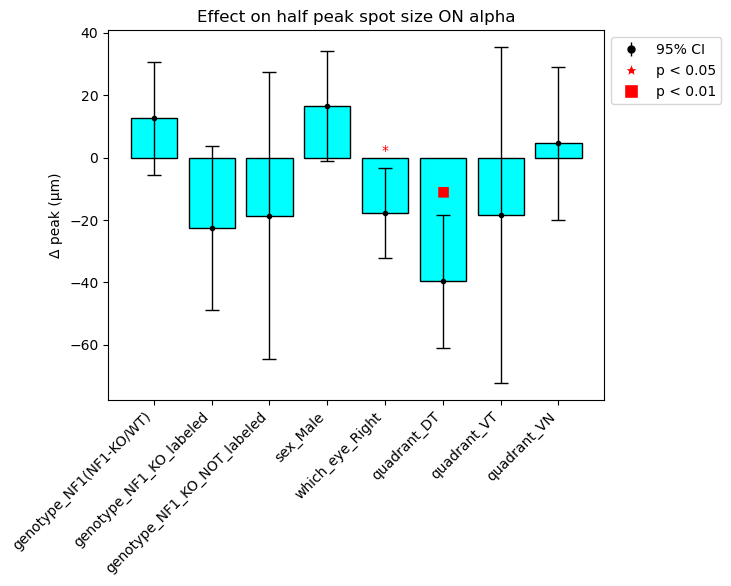

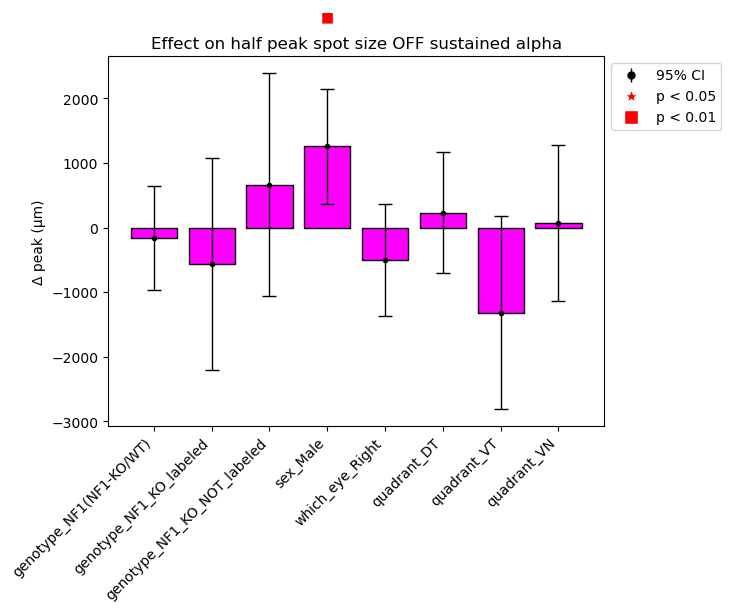

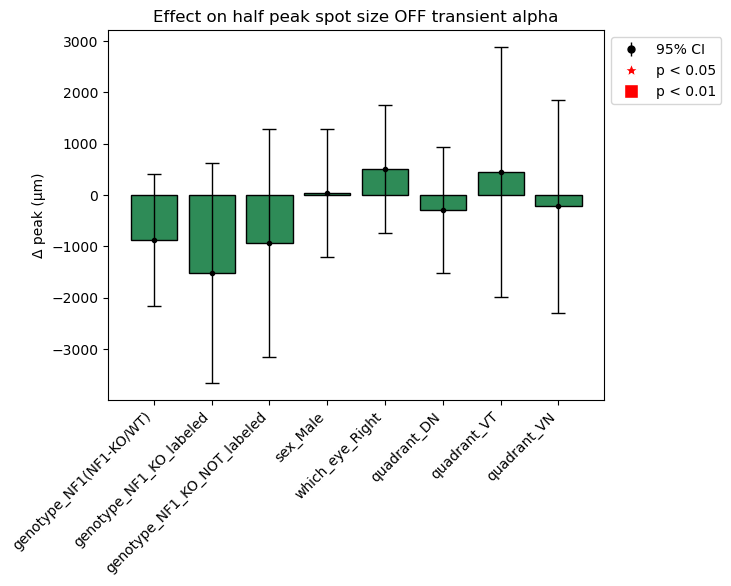

In [90]:
#Plot effect on half peak sixe
show_plots('lme_half_peak_size', 'half peak spot size','Δ peak (µm)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


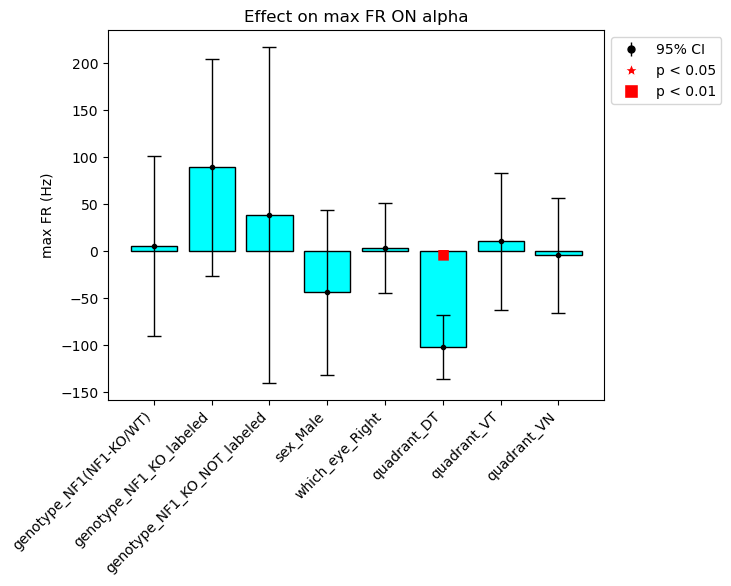

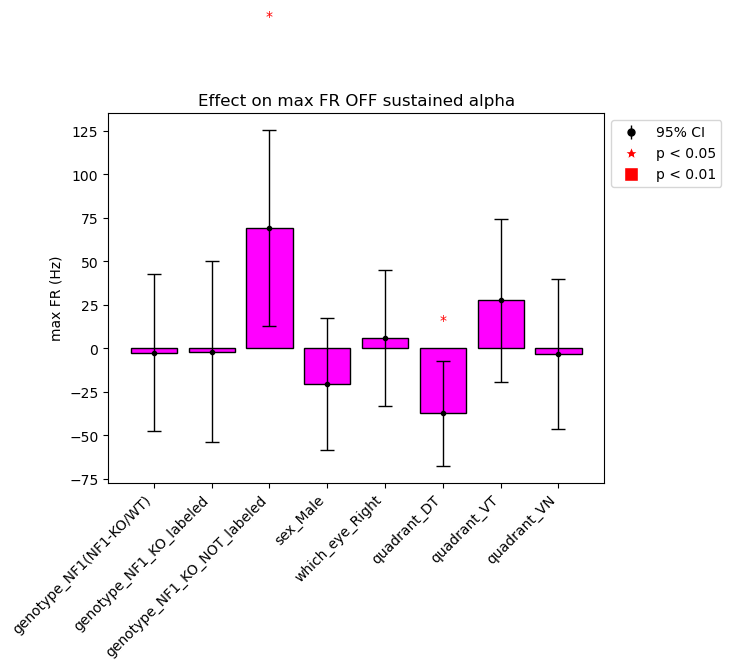

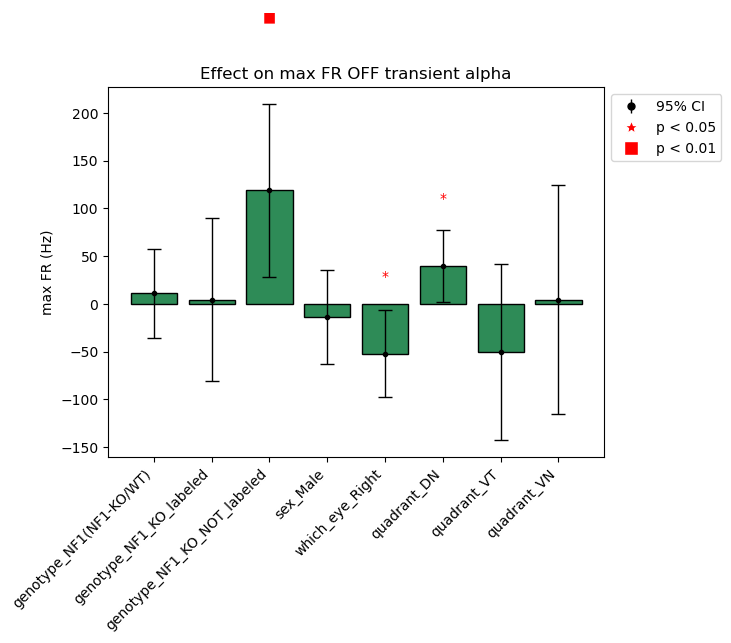

In [91]:
#Plot effect on Max FR
show_plots('lme_max_FR', 'max FR', 'max FR (Hz)')

C:\Users\santi\AppData\Local\Temp\ipykernel_33832\3996029559.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(var_names, rotation=45, ha='right')


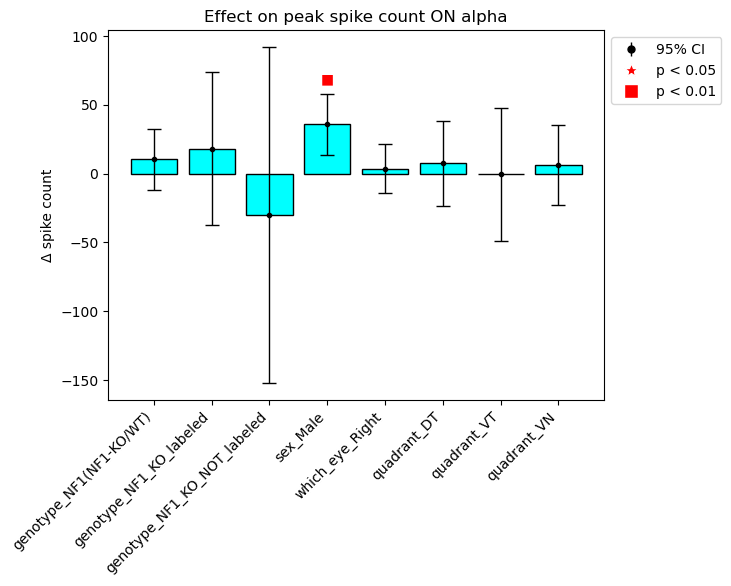

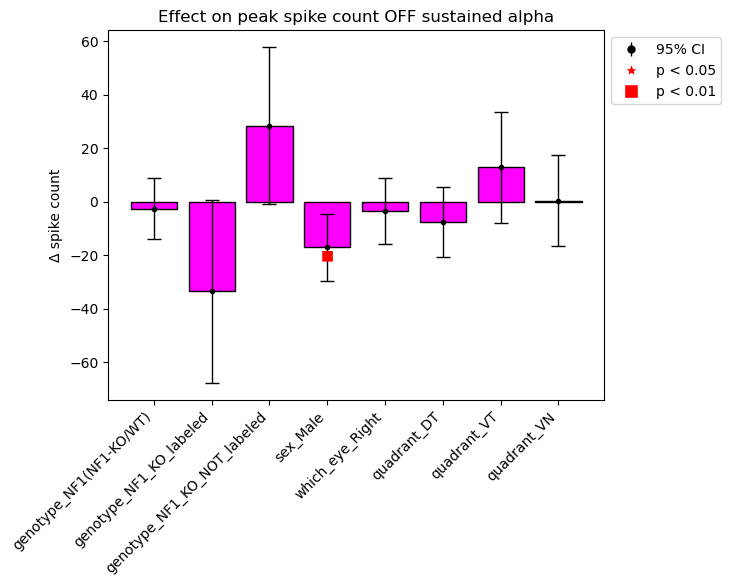

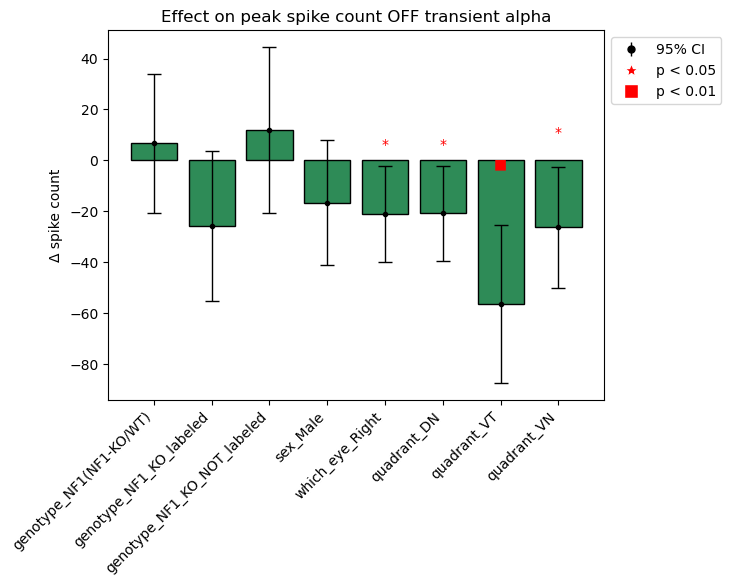

In [92]:
#Plot effect on peak spike count
show_plots('lme_peak_spikes', 'peak spike count', 'Δ spike count')